# 코로나 데이터  
https://kdx.kr/data/view/25918

코로나 감염자의 추이를 확인하고 사망율의 변화를 살펴보자

In [35]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

In [52]:
covid_kr = pd.read_csv('../data/Covid19InfState.csv')

데이터를 불러왔으니 간단히 데이터를 살펴보자..

In [53]:
covid_kr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seq             1073 non-null   int64  
 1   stateDt         1073 non-null   int64  
 2   stateTime       1073 non-null   object 
 3   decideCnt       1071 non-null   float64
 4   clearCnt        690 non-null    float64
 5   examCnt         691 non-null    float64
 6   deathCnt        1036 non-null   float64
 7   careCnt         633 non-null    float64
 8   resutlNegCnt    633 non-null    float64
 9   accExamCnt      691 non-null    float64
 10  accExamCompCnt  633 non-null    float64
 11  accDefRate      633 non-null    float64
 12  createDt        1073 non-null   object 
 13  updateDt        76 non-null     object 
dtypes: float64(9), int64(2), object(3)
memory usage: 117.5+ KB


In [54]:
covid_kr.head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,1135,20230118,00:00,29898142.0,NaN,NaN,33057.0,NaN,NaN,NaN,NaN,NaN,2023-01-18 06:08:27.0,NaN
1,1134,20230117,00:00,29861234.0,NaN,NaN,33014.0,NaN,NaN,NaN,NaN,NaN,2023-01-17 03:40:10.0,NaN
2,1133,20230116,00:00,29821035.0,NaN,NaN,32984.0,NaN,NaN,NaN,NaN,NaN,2023-01-16 01:37:44.0,NaN
3,1132,20230115,00:00,29806891.0,NaN,NaN,32949.0,NaN,NaN,NaN,NaN,NaN,2023-01-15 01:16:52.0,2023-01-15 10:03:19.0
4,1130,20230114,00:00,29774321.0,NaN,NaN,32912.0,NaN,NaN,NaN,NaN,NaN,2023-01-14 06:11:49.0,2023-01-14 09:26:34.0


In [55]:
covid_kr.tail()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
1068,5,20200205,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.31,2020-02-05 9:43:16.16
1069,4,20200204,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.59,NaN
1070,3,20200203,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.17,2020-02-04 14:19:46.46
1071,2,20200202,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.49,NaN
1072,1,20200101,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.33,2020-02-03 12:21:56.56


tail 데이터를 살펴보니 날자별 중복이 존재한다.   
stateTime 데이터를 살펴보면 검사 결과(?)가 나온 시간데 같은데, 같은 날이라도 시간대가 다르면 다른 데이터라고 봐도 될 것 같다. 그런데 날자와 시간이 모두 같으면 중복이라고 판단할 수 있다. 

날자와 시간 데이터가 같은 것을 제거하자. 

In [58]:
covid_kr.drop_duplicates(['stateDt', 'stateTime'], inplace=True)
covid_kr = covid_kr.reset_index(drop=True)

In [59]:
covid_kr.tail()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
1056,5,20200205,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.31,2020-02-05 9:43:16.16
1057,4,20200204,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.59,NaN
1058,3,20200203,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.17,2020-02-04 14:19:46.46
1059,2,20200202,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.49,NaN
1060,1,20200101,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.33,2020-02-03 12:21:56.56


날자와 시간이 같은 데이터의 중복을 제거했다.  
이제 info()로 데이터를 살펴보자.

In [60]:
covid_kr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seq             1061 non-null   int64  
 1   stateDt         1061 non-null   int64  
 2   stateTime       1061 non-null   object 
 3   decideCnt       1059 non-null   float64
 4   clearCnt        678 non-null    float64
 5   examCnt         679 non-null    float64
 6   deathCnt        1028 non-null   float64
 7   careCnt         626 non-null    float64
 8   resutlNegCnt    626 non-null    float64
 9   accExamCnt      684 non-null    float64
 10  accExamCompCnt  626 non-null    float64
 11  accDefRate      626 non-null    float64
 12  createDt        1061 non-null   object 
 13  updateDt        76 non-null     object 
dtypes: float64(9), int64(2), object(3)
memory usage: 116.2+ KB


info()를 통해 살펴보니 1073의 행이 있고, 14개의 열이 있다.  
우리는 이 중에서 확진자 누적 정보(decideCnt)와 누적 사망자 정보(deathCnt)를 사용해 일일 확진자와 사망자 그리고 사망율을 구해보자.

decideCnt와 deathCnt에 null값이 있는 것을 확인할 수 있다. 어떤 행에 Null이 있는지 살펴보자

In [61]:
# deathCnt에 null 값 확인
covid_kr[covid_kr.deathCnt.isnull() == True]

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
1027,38,20200220,09:00,82.0,16.0,1633.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20 10:01:31.31,NaN
1028,37,20200219,16:00,51.0,16.0,1149.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-19 17:00:13.13,NaN
1029,36,20200219,09:00,46.0,12.0,1030.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-19 9:53:08.08,NaN
1030,35,20200218,16:00,31.0,12.0,818.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-18 16:42:00.00,NaN
1031,34,20200218,09:00,31.0,10.0,957.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-18 10:05:31.31,NaN
1032,32,20200217,16:00,30.0,10.0,708.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-17 16:50:47.47,NaN
1033,31,20200217,09:00,30.0,9.0,408.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-17 9:53:13.13,NaN
1034,30,20200216,16:00,29.0,9.0,485.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-16 16:57:02.02,NaN
1035,29,20200216,09:00,29.0,9.0,577.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-16 10:04:04.04,NaN
1036,28,20200215,16:00,28.0,9.0,558.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-15 17:00:21.21,NaN


2020년 2월 20일 이전에는 사망자 정보가 없다는 것을 볼 수 있다. 그럼 이 행을 모두 제거하자

In [62]:
# deathCnt 결측치 제거
covid_kr = covid_kr.iloc[:1027]

In [63]:
# 제거한 결과를 살펴보자
covid_kr[covid_kr.deathCnt.isnull() == True]

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt


없는 것을 확인했다. 이제는 decideCnt 결측치 2개를 확인해보자

In [64]:
covid_kr[covid_kr.decideCnt.isnull()==True]

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt


결측치가 사라진 것을 보니 deathCnt와 중복된 결측치가 있었던 것 같다.   
결측치를 제거했으니 데이터 손질을 시작하자. 

사용할 데이터는 날자, 누적확진자수, 누적사망자수 이므로 이 세 데이터만 가져와서 세로운 DateFrame을 만들자

In [69]:
# 손질 전 데이터 갯수
len(covid_kr.iloc[:])

1027

In [74]:
covid_dtdc = pd.DataFrame()

In [81]:
covid_dtdc = covid_kr.groupby('stateDt')[['decideCnt', 'deathCnt']].sum()

In [82]:
covid_dtdc

,decideCnt,deathCnt
stateDt,,
20200220,104.0,1.0
20200221,360.0,2.0
20200222,779.0,4.0
20200223,1158.0,9.0
20200224,1596.0,14.0
20200225,1870.0,18.0
20200226,2407.0,23.0
20200227,3361.0,25.0
20200228,4359.0,26.0


In [78]:
# 손질 후 데이터 갯수
len(covid_dtdc.iloc[:])

1017

In [79]:
covid_dtdc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 0 to 1026
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1017 non-null   int64  
 1   decideCnt  0 non-null      float64
 2   deathCnt   0 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 31.8 KB


데이터 날짜를 오름차순으로 정렬하려고 한다. 데이터 reverse를 통해 오름차순 정렬을 해보자

In [85]:
covid_dtdc=covid_dtdc.loc[::-1]

In [86]:
covid_dtdc.head()

,decideCnt,deathCnt
stateDt,,
20200220,104.0,1.0
20200221,360.0,2.0
20200222,779.0,4.0
20200223,1158.0,9.0
20200224,1596.0,14.0


누적 데이터를 차분해서 일별 신규 데이터를 얻자. 


In [93]:
covid_dtdc['newDecideCnt'] = covid_dtdc['decideCnt'].diff(1)
covid_dtdc['newDeathCnt'] = covid_dtdc['deathCnt'].diff(1)

In [94]:
covid_dtdc.head()

,decideCnt,deathCnt,newDecideCnt,newDeathCnt
stateDt,,,,
20200220,104.0,1.0,NaN,NaN
20200221,360.0,2.0,256.0,1.0
20200222,779.0,4.0,419.0,2.0
20200223,1158.0,9.0,379.0,5.0
20200224,1596.0,14.0,438.0,5.0


차분한 데이터이므로 첫날은 값이 없다. 이 값을 decideCnt와 deathCnt로 넣자

In [96]:
covid_dtdc.loc[20200220, 'newDecideCnt'] = covid_dtdc.loc[20200220, 'decideCnt']

In [99]:
covid_dtdc.loc[20200220, 'newDeathCnt'] = covid_dtdc.loc[20200220, 'deathCnt']

In [100]:
covid_dtdc.head()

,decideCnt,deathCnt,newDecideCnt,newDeathCnt
stateDt,,,,
20200220,104.0,1.0,104.0,1.0
20200221,360.0,2.0,256.0,1.0
20200222,779.0,4.0,419.0,2.0
20200223,1158.0,9.0,379.0,5.0
20200224,1596.0,14.0,438.0,5.0


In [102]:
covid_dtdc['deathRate'] = round(covid_dtdc.newDeathCnt.div(covid_dtdc.newDecideCnt) * 100, 2)

In [106]:
covid_dtdc.head(50)

,decideCnt,deathCnt,newDecideCnt,newDeathCnt,deathRate
stateDt,,,,,
20200220,104.0,1.0,104.0,1.0,0.96
20200221,360.0,2.0,256.0,1.0,0.39
20200222,779.0,4.0,419.0,2.0,0.48
20200223,1158.0,9.0,379.0,5.0,1.32
20200224,1596.0,14.0,438.0,5.0,1.14
20200225,1870.0,18.0,274.0,4.0,1.46
20200226,2407.0,23.0,537.0,5.0,0.93
20200227,3361.0,25.0,954.0,2.0,0.21
20200228,4359.0,26.0,998.0,1.0,0.10


In [110]:
covid_dtdc.describe()

,decideCnt,deathCnt,newDecideCnt,newDeathCnt,deathRate
count,1.017000e+03,1017.000000,1017.000000,1017.000000,1017.000000
mean,6.454063e+06,8819.220256,29398.369715,32.504425,1.418191
std,1.010389e+07,11375.665238,74946.179951,72.068293,3.945750
min,1.040000e+02,1.000000,-3050.000000,-13.000000,0.000000
25%,2.651100e+04,464.000000,313.000000,2.000000,0.090000
50%,1.765000e+05,2055.000000,1318.000000,8.000000,0.330000
75%,1.700986e+07,22325.000000,25108.000000,36.000000,1.190000
max,2.989814e+07,33057.000000,840822.000000,892.000000,66.670000


In [117]:
covid_dtdc[covid_dtdc['deathRate'] > 5]

,decideCnt,deathCnt,newDecideCnt,newDeathCnt,deathRate
stateDt,,,,,
20200312,7869.0,66.0,114.0,6.0,5.26
20200317,8320.0,81.0,84.0,6.0,7.14
20200321,8799.0,102.0,147.0,8.0,5.44
20200323,8961.0,111.0,64.0,7.0,10.94
20200324,9037.0,120.0,76.0,9.0,11.84
20200325,9137.0,126.0,100.0,6.0,6.00
20200327,9332.0,139.0,91.0,8.0,8.79
20200329,9583.0,152.0,105.0,8.0,7.62
20200330,9661.0,158.0,78.0,6.0,7.69


<AxesSubplot:xlabel='stateDt'>

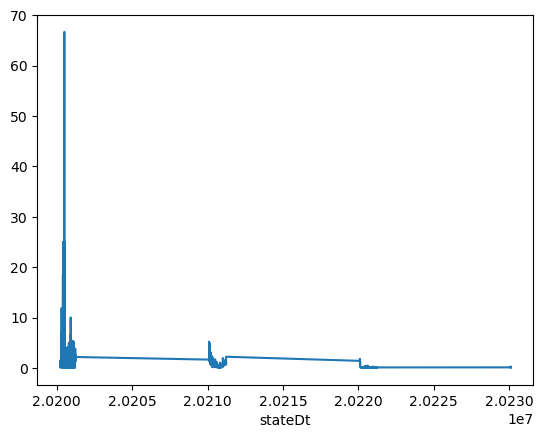

In [116]:
covid_dtdc.deathRate.plot()